In [1]:
import pandas as pd

df = pd.read_csv("../running_log.txt", names = ["Average start time range", "Fixed-timestep discretization", "Continuous Expression"])
df

,Average start time range,Fixed-timestep discretization,Continuous Expression
0,2,Ok(664.18172ms),Ok(2.718514ms)
1,2,Ok(660.577957ms),Ok(2.707664ms)
2,2,Ok(661.40664ms),Ok(2.679359ms)
3,2,Ok(660.972629ms),Ok(2.673321ms)
4,2,Ok(666.990744ms),Ok(2.672938ms)
...,...,...,...
503,7,Ok(4.224435274s),Ok(3.543606ms)
504,7,Ok(4.182687719s),Ok(3.380392ms)
505,7,Ok(4.283064632s),Ok(3.570846ms)
506,7,Ok(5.060313203s),Ok(5.898544ms)


In [2]:
import math

def get_time_in_seconds(input: str):
    if type(input) is not str:
        return input
    start = input.find("(")
    if start == -1:
        return input
    end = input.find(")")
    if input[start:end].endswith("ms"):
        multiplier = 0.001
        newend = end-2
    elif input[start:end].endswith("ns"):
        multiplier = 1e-9
        newend = end - 2
    elif input[start:end].endswith("µs"):
        multiplier = 1e-6
        newend = end - 2
    elif input[start:end].endswith("s"):
        multiplier = 1
        newend = end - 1
    try:
        result = float(input[start+1:newend]) * multiplier
        if result < 1e-6:
            return 10000
        return result
    except:
        return input

cleaned_data = df.applymap(get_time_in_seconds)
cleaned_data

,Average start time range,Fixed-timestep discretization,Continuous Expression
0,2,0.664182,0.002719
1,2,0.660578,0.002708
2,2,0.661407,0.002679
3,2,0.660973,0.002673
4,2,0.666991,0.002673
...,...,...,...
503,7,4.224435,0.003544
504,7,4.182688,0.003380
505,7,4.283065,0.003571
506,7,5.060313,0.005899


In [3]:
cleaned_data["Average start time range"] = cleaned_data["Average start time range"].apply(lambda x: x*20)

cleaned_data

,Average start time range,Fixed-timestep discretization,Continuous Expression
0,40,0.664182,0.002719
1,40,0.660578,0.002708
2,40,0.661407,0.002679
3,40,0.660973,0.002673
4,40,0.666991,0.002673
...,...,...,...
503,140,4.224435,0.003544
504,140,4.182688,0.003380
505,140,4.283065,0.003571
506,140,5.060313,0.005899


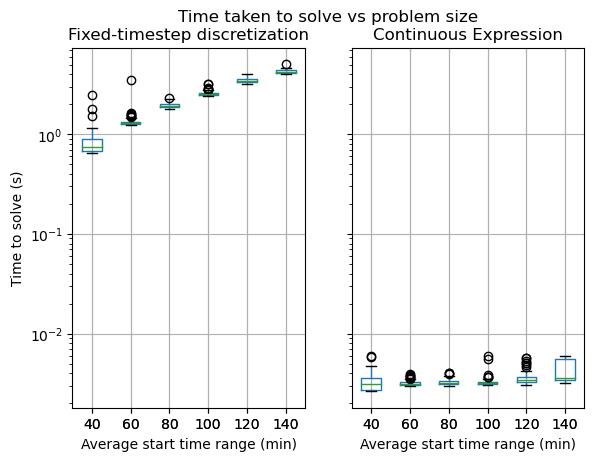

In [5]:
import matplotlib.pyplot as plt


plot = cleaned_data.boxplot(column=["Fixed-timestep discretization", "Continuous Expression"], by="Average start time range")

for p in plot:
    p.set_yscale('log')
    p.set_ylabel('Time to solve (s)')
    p.set_xlabel('Average start time range (min)')

plt.suptitle("Time taken to solve vs problem size")
plt.show()